# Adaptive Filters
## LMS and Normalized LMS

Assignment:<br>f.	Reproduce paragraph 6.7<br>g.	Chapter 6, problem 19<br>h.	Chapter 6, problem 18<br>i.	Chapter 7, problem 10
***
<center>Natanael Magno Gomes <b>397645</b></center>

***

In [1]:
#------------------------------------------------
# Import the libraries and config the environment
#------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

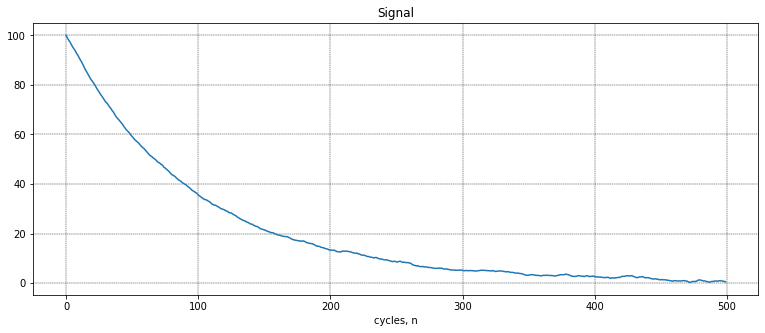

In [2]:
#------------------------------------------------
# Reproduce paragraph 6.7
#------------------------------------------------

# The difference formula is u(n) = -a * u(n - 1) + v(n)
# Let's create a function to create the signal with a
# given initial condition, the parameter a and sigma.

def ar(nsample, ic = 1, a = -0.99, sigma = 0.1342):  # sigma_square = 0.936
    v = np.random.normal(0,sigma,nsample)
    u = np.zeros(nsample)
    u[0] = ic
    for n in range(1,nsample,1):
        u[n] = (-1) * a * u[n-1] + v[n]
    return u

# initialize the random seed
np.random.seed(42) # the answer to life the universe and everything: 42
nsample = 500

u = ar(nsample, ic = 100)

# Plot
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Signal')
ax.plot(u)
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()

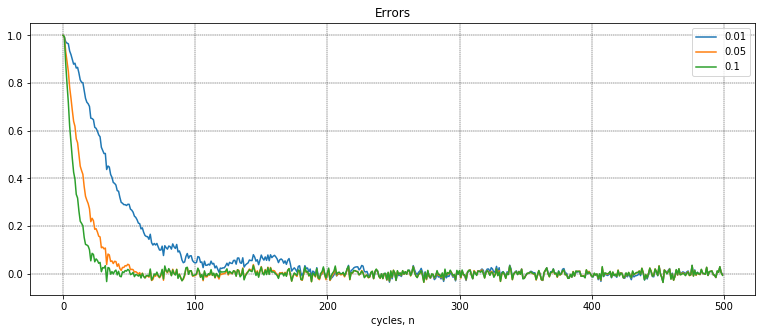

In [3]:
# for this experiment the LMS filter has only one tap

init = 1
carlos = 100
mus = 3
y = np.zeros(nsample)
e = np.zeros((nsample,3,carlos))
taps = np.zeros((nsample,3,carlos))
mu = np.zeros(mus)
mu[0] = 0.01
mu[1] = 0.05
mu[2] = 0.1
# initialize the random seed
np.random.seed(42) # the answer to life the universe and everything: 42

#run 100 Monte Carlos simulations to calculate the mean
for i in range(carlos):
    #for each simulation there is an u[n]
    u = ar(nsample, ic = init)
    e[0,:,i] = u[0]
    # run for the 3 mu
    for k in range(mus):
        # The LMS Filter for just one tap weight
        w = 0
        for n in range(1,nsample,1):
            # calculating step
            y[n] = u[n-1] * w
            # updating step
            e[n,k,i] = u[n] - y[n]
            w = w + mu[k] * u[n-1] * e[n,k,i]
            taps[n,k,i] = w
# Calculate the mean
f = np.zeros((nsample,mus))
for k in range(mus):
    f[:,k] = np.mean(e[:,k,:], axis=1)

# Plot the Errors
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.set_title('Errors')
for k in range(mus):
    ax.plot(f[:,k],label=mu[k])
ax.set_xlabel('cycles, n'), ax.grid(linestyle='--',linewidth='0.4', color='black')
ax.legend()
# plt.yscale('log')
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)
plt.show()



In [4]:
# aa = np.std(ar(50*nsample, ic = 0.99, sigma_square=0))
# np.std(ar(5000*nsample, ic = 0.99, sigma_square=0.018))
np.sqrt(0.018)

0.1341640786499874

## Reference

[1] Haykin, S. S. (2012). Adaptive filter theory. Pearson Education.